In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial 
import time

# data generation(all in range 0~1)

In [2]:
scales = [10**i for i in range(1,9)]

In [3]:
dataset_list={}
for i in range(len(scales)):
    dataset_list[i]=np.random.random((10,scales[i]))

# sort algorithms

## Insertion Sort

In [4]:
def insertionSort(b):
    a=b.copy()
    N=len(a)
    for i in range(1,N):
        for j in reversed(range(1,i+1)):
            if a[j]>=a[j-1]:
                break
            c = a[j]
            a[j] = a[j-1]
            a[j-1] = c
    return a

## Merge Sort

In [5]:
def merge(arr, l, m, r): 
    n1 = m - l + 1
    n2 = r- m 
  
    L = [0] * (n1)
    R = [0] * (n2)
  
    for i in range(0 , n1): 
        L[i] = arr[l + i] 
  
    for j in range(0 , n2): 
        R[j] = arr[m + 1 + j] 
  
    i = 0     
    j = 0     
    k = l    
  
    while i < n1 and j < n2 : 
        if L[i] <= R[j]: 
            arr[k] = L[i] 
            i += 1
        else: 
            arr[k] = R[j] 
            j += 1
        k += 1
  
    while i < n1: 
        arr[k] = L[i] 
        i += 1
        k += 1
  
    while j < n2: 
        arr[k] = R[j] 
        j += 1
        k += 1

In [6]:
def mergeSort(arr,l,r): 
    if l < r:         
        m = int((l+(r-1))/2)       
        mergeSort(arr, l, m) 
        mergeSort(arr, m+1, r) 
        merge(arr, l, m, r) 

## Quick Sort

In [7]:
def QuikeSort(a):
    if a==[]:
        return []
    else:
        small = [x for x in a[1:] if x < a[0]]
        big = [x for x in a[1:] if x >= a[0]]
        return QuikeSort(small)+[a[0]]+QuikeSort(big)

# selection without sort

In [71]:
def calculate_p(a):
    a = np.array(a)
    N = a.shape[0]
    if N==1:
        return a[0]
    elif N<5:
        if N%2==0:
#             print(N)
            return 0.5*(sorted(a)[N//2]+sorted(a)[N//2-1])
        else:
            return sorted(a)[N//2]
    N_big = N
    if not N%5==0:
        N_big = N+5-N%5
    fold = N_big//5
    b = np.zeros((fold,5))
    b_list = []
    if not N%5==0:
        for i in range(fold-1):
            b[i]=a[i*5:(i+1)*5]
        remain = N+5-N_big
        b[fold-1][:remain]=a[N_big-5:N]
        b[fold-1][remain:]=float("inf")
        for i in range(fold-1):
            b_list.append(sorted(b[i])[2])
        if (-N_big+N+5)%2==0:
            b_list.append(0.5*(sorted(b[fold-1][:remain])[remain//2]+sorted(b[fold-1])[remain//2-1]))
        else:
            b_list.append(sorted(b[fold-1][:remain])[remain//2])
    else:
        for i in range(fold):
            b[i]=a[i*5:(i+1)*5]
            b_list.append(sorted(b[i])[2])
#     print(b_list)
    p = calculate_p(b_list)
    return p

In [72]:
def partition_p(a):
    p = calculate_p(a)
    a_left,a_right,a_equal=[],[],[]
    for i in range(len(a)):
        if a[i]<p:
            a_left.append(a[i])
        elif a[i]==p:
            a_equal.append(a[i])
        else:
            a_right.append(a[i])
    return a_left,a_equal,a_right

In [73]:
def selection(a,k):
    a_left,a_equal,a_right = partition_p(a)
#     print(a_left,a_equal,a_right)
    if len(a_left)>=k:
        return selection(a_left,k)
    elif len(a_left)+len(a_equal)>=k:
        return a_equal[0]
    else:
        k_ = k-len(a_left)-len(a_equal)
        return selection(a_right,k_)

In [68]:
a = [1,5,2,76,5]
sorted(a),sorted(a)[3],selection(a,4)

([1, 2, 5, 5, 76], 5, 5)

In [12]:
t0 = time.process_time()
for i in range(1000):
    selection(a,9)
print(time.process_time()-t0)

0.026975734999999723


# Plot the Results

## Compare serveral algorithms

In [13]:
def test_insertion_quick(scale,alg,n=10):
    t0 = time.process_time()
    for j in range(n):
        for i in range(10):
            alg(dataset_list[scale-1][i].copy())
    return (time.process_time()-t0)/(10*n)

In [18]:
insertion_list = [test_insertion_quick(1,insertionSort,100)]
for i in range(2,5):
    insertion_list.append(test_insertion_quick(i,insertionSort))
insertion_list

[2.7623735000000593e-05,
 0.001570874670000002,
 0.14868630559999998,
 15.019524824360001]

In [19]:
def test_merge(scale,alg,n=10):
    t0 = time.process_time()
    for j in range(n):
        for i in range(10): 
#             print(dataset_list[scale-1][i].shape)
            alg(dataset_list[scale-1][i].copy(),0,scales[scale-1]-1)
    return (time.process_time()-t0)/(10*n)

In [20]:
merge_list = [test_merge(1,mergeSort,1000)]
for i in range(2,8):
    merge_list.append(test_merge(i,mergeSort))
merge_list

[2.3348490000012134e-05,
 0.0003094620699994266,
 0.004308486980000907,
 0.05659699914999919,
 0.6841428618999998,
 7.9797736001500015,
 92.31189746439]

In [21]:
quick_list = [test_insertion_quick(1,QuikeSort,100)]
for i in range(2,8):
    quick_list.append(test_insertion_quick(i,QuikeSort))
quick_list

/home/shaobowang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


[2.66940949986747e-05,
 0.00019266450000941405,
 0.002375610319995758,
 0.028415145369999662,
 0.3388311810699997,
 4.1648118436699955,
 58.65553485593002]

In [158]:
def plot_fig():
    plt.figure(figsize=(7,5))
    plt.plot(range(4),np.log10(insertion_list))
    plt.plot(range(7),np.log10(merge_list))
    plt.plot(range(7),np.log10(quick_list))
    plt.xticks(range(7),['1e'+str(i) for i in range(1,8)])
    plt.yticks(range(-5,3),['1e'+str(i) for i in range(-5,3)])
    plt.xlabel("Dataset Scale")
    plt.ylabel("Average Time for each scale")
    plt.title('Compare serveral sort algorithms')
    plt.legend(('Insertion','Merge','Quick'))
    plt.savefig('sort.jpg',dpi=300)

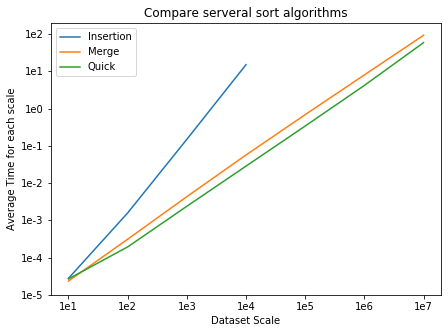

In [159]:
plot_fig()

quick sort is the best!

## Compare quicksort with the selection algorithm

compare quick sort with selection algorithm: randomly select a k.Because this operation can be done in $O(1)$, so we can neglect this influence on the time.

In [80]:
def test_selection(scale,n=10):
    t0 = time.process_time()
    for j in range(n):
        for i in range(10): 
            selection(dataset_list[scale-1][i].copy(),k_list[scale-1])
    return (time.process_time()-t0)/(10*n)

randomly select $k$s for each data scale

In [74]:
k_list = [np.random.randint(scales[i],scales[i+1])//10 for i in range(7)]
k_list

[1, 79, 989, 1439, 16815, 623967, 8014645]

In [85]:
selection_list = [test_selection(1,100)]
# print(selection_list)
for i in range(2,8):
    selection_list.append(test_selection(i))
selection_list

[3.5333858999365476e-05,
 0.00021469781000632793,
 0.0017644493899933878,
 0.01696041311002773,
 0.16808913785000187,
 1.7034390812499987,
 17.119067000019967]

In [27]:
quick_list

[2.66940949986747e-05,
 0.00019266450000941405,
 0.002375610319995758,
 0.028415145369999662,
 0.3388311810699997,
 4.1648118436699955,
 58.65553485593002]

In [154]:
def plot_fig_final():
    plt.figure(figsize=(7,5))
    plt.plot(range(7),np.log10(quick_list))
    plt.plot(range(7),np.log10(selection_list))
    plt.xticks(range(7),['1e'+str(i) for i in range(1,8)])
    plt.yticks(range(-5,3),['1e'+str(i) for i in range(-5,3)])
    plt.xlabel("Dataset Scale")
    plt.ylabel("Average Time for each scale")
    plt.title('Compare 2 algorithms')
    plt.legend(('Quick','Selection'))
    plt.savefig('result.jpg',dpi=300)

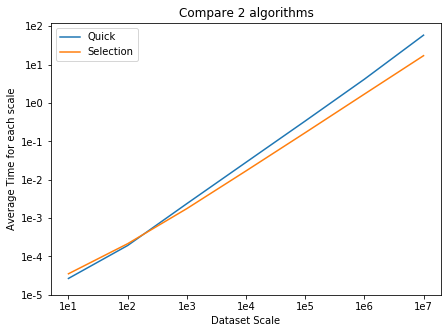

In [155]:
plot_fig_final()

As we can see, selection algorithm is better than quick sort. \
Furthermore, we can see that in the small data scale, quick sort may be better. I think it is because the indexing operation may contribute a litte in small data scale. In large scale, however, this influence is too tiny to be considered.